
# <center>Regression Trees</center>
## <center>Kirill Zakharov</center>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

Рассмотрим сдедующую задачу регрессии:

In [3]:
X = np.linspace(-2, 2, 7)
y = X ** 3

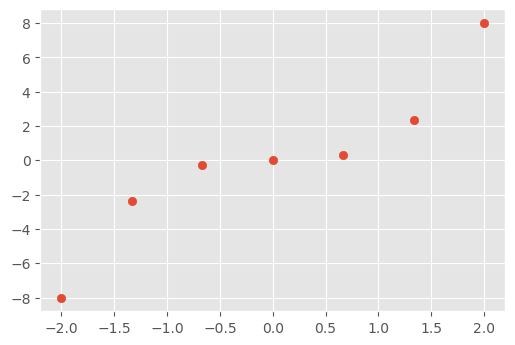

In [30]:
plt.subplots(dpi=100)
plt.scatter(X, y)

plt.show()

Проделаем несколько шагов в построении дерева регрессии. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. В случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

**Задание 1.** Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

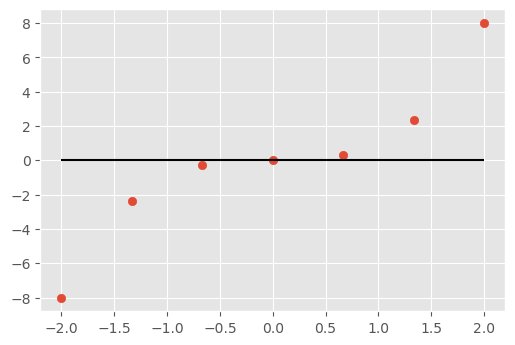

In [29]:
plt.subplots(dpi=100)

plt.scatter(X, y)
plt.hlines(y.mean(), -2, 2, color='black')

plt.show()

**Задание 2.** Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

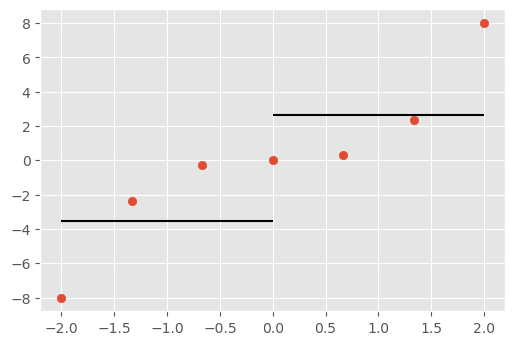

In [33]:
plt.subplots(dpi=100)

plt.scatter(X, y)
plt.hlines(y[X >= 0].mean(), 0, 2, color='black')
plt.hlines(y[X < 0].mean(), -2, 0, color='black')

plt.show()

В алгоритме построения дерева регрессии признак и значение порога, по которым происходит разбиение выборки, выбираются по дисперсионному критерию:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

**Задание 3.** Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [34]:
def regression_crit(X, y, t):
    
    XRight = X[X >= t]
    XLeft = X[X < t]
    
    yRight = y[X >= t]
    yLeft = y[X < t]
    
    n = len(X)
    n_right = len(XRight)
    n_left = len(XLeft)

    D = y.std()**2
    DRight = yRight.std()**2
    DLeft = yLeft.std()**2
    
    return D - (n_left/n) * DLeft - (n_right/n) * DRight

In [35]:
t = np.linspace(-1.9, 1.9, 100)

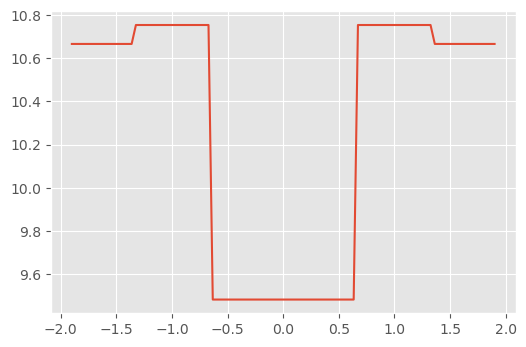

In [37]:
plt.subplots(dpi=100)

plt.plot(t, [regression_crit(X, y, val) for val in t])

plt.show()

Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?

#### Ответ: Нет, потому что при t = 0 значение критерия меньше, чем при других t

**Задание 4.** Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [39]:
XLeft = X[X < 0]
XRight = X[X >= 0]

yLeft = y[X < 0]
yRight = y[X >= 0]

In [40]:
XLeft1 = XLeft[XLeft < -1.5]
XLeft2 = XLeft[XLeft >= -1.5]

XRight1 = XRight[XRight < 1.5]
XRight2 = XRight[XRight >= 1.5]

yLeft1 = yLeft[XLeft < -1.5]
yLeft2 = yLeft[XLeft >= -1.5]

yRight1 = yRight[XRight < 1.5]
yRight2 = yRight[XRight >= 1.5]

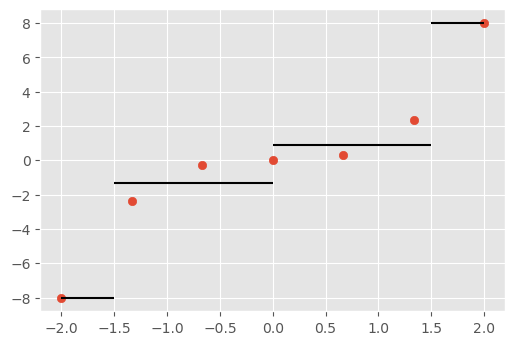

In [41]:
plt.subplots(dpi=100)

plt.scatter(X, y)
plt.hlines(yLeft1.mean(), -2, -1.5, color='black')
plt.hlines(yLeft2.mean(), -1.5, 0, color='black')
plt.hlines(yRight1.mean(), 0, 1.5, color='black')
plt.hlines(yRight2.mean(), 1.5, 2, color='black')

plt.show()

Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке $[-2, 2]$?

#### Ответ: График состоит из 4 отрезков